### Ejemplos.com

#### Conejos vs. Ovejas.

Imaginemos que en un mismo ecosistema se encuentran conejos y ovejas. Supongamos, además, que ambas compiten por el mismo alimento (hierba) y que la cantidad total de alimento es limitada. Se ignoran otros factores como depredadores, efectos de temporada (estaciones), y otras fuentes de comida. El modelo de competición entre dos especies **Lotka-Volterra** nos sirve para describir este fenómeno.

Dos fenómenos importantes:
- Cada especie crecería hasta su capacidad máxima en ausencia de la otra especie. Esto se puede modelar con la ecuación logística para cada especie. Los conejos tienen una habilidad soprendente para reproducirse, entonces comparativamente deberían crecer más.
- Cuando conejos y ovejas se encuentran, empieza la competencia. Algunas veces los conejos comen, pero las ovejas (al ser más grandes) ganarán el derecho a la comida la mayoría de las veces. Supondremos que dichos conflictos se dan a una tasa proporcional al tamaño de cada población (si hay dos veces más ovejas, la probabilidad de que un conejo encuentre a una oveja será el doble). Supondremos que dicha competencia disminuirá la tasa de crecimiento para cada especie, y el efecto será mayor para los conejos.

Con las consideraciones anteriores, un modelo específico es:

\begin{align}
\frac{dx_1}{dt} &= x_1(3-x_1-2x_2)\\
\frac{dx_2}{dt} &= x_2(2-x_2-x_1),
\end{align}

donde $x_1(t)\geq 0$ es la población de conejos al instante $t$ y $x_2(t)\geq 0$ es la población de ovejas al instante $t$. Definimos $x=\left[x_1\quad x_2\right]^T$.

Esta selección de coeficientes se tiene para recrear el escenario descrito. Sin embargo, este modelo se puede utilizar para estudiar competición entre especies en general y los coeficientes cambiarán en cada caso.

---

Simule el sistema para cada una de las siguientes condiciones iniciales. Para cada caso, obtenga gráficas de $x_1$ vs. $t$, $x_2$ vs. $t$ y $x_2$ vs. $x_1$. ¿Qué pasa con las poblaciones de conejos y de ovejas cuando $t\to\infty$? ¿Pueden coexistir?

1. $x(0)=\left[x_1(0)\quad x_2(0)\right]^T = [0.5 \quad 1]^T$.
2. $x(0)=\left[x_1(0)\quad x_2(0)\right]^T = [1 \quad 0.5]^T$.

---

Referencia:
- Strogatz, Steven. *NONLINEAR DYNAMICS AND CHAOS*, ISBN: 9780813349107, (eBook disponible en biblioteca).

In [1]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def func(x,t):
    dx=[0,0] # Especificamos la dimensión
    dx[0]=x[0]*(3-x[0]-2*x[1])
    dx[1]=x[1]*(2-x[1]-x[0])
    return dx

In [3]:
x0=np.array([0.5,1])    # Condiciones iniciales
t=np.linspace(0,10,200) # Tiempo de simulación

# Solución
x=odeint(func,x0,t)
x1=x[:,0] # Se extrae la solución de x_1
x2=x[:,1] # Se extrae la solución de x_2

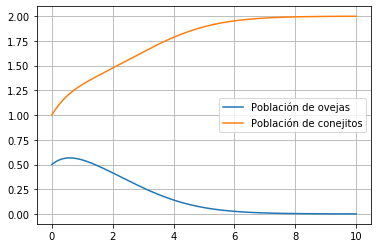

In [5]:
plt.plot(t,x1,label='Población de ovejas')
plt.plot(t,x2,label='Población de conejitos')
plt.legend(loc='best')
plt.grid()

In [14]:
x0=np.array([1,0.5])
x=odeint(func,x0,t)
x1=x[:,0]
x2=x[:,1]

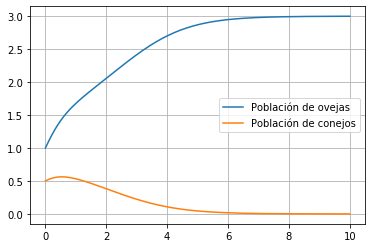

In [15]:
plt.plot(t,x1,label='Población de ovejas')
plt.plot(t,x2,label='Población de conejos')
plt.legend(loc='best')
plt.grid()

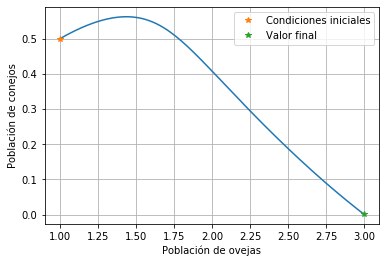

In [17]:
plt.plot(x1,x2)
plt.plot(x1[0],x2[0],'*',label='Condiciones iniciales')
plt.plot(x1[-1],x2[-1],'*',label='Valor final')
plt.xlabel('Población de ovejas')
plt.ylabel('Población de conejos')
plt.legend(loc='best')
plt.grid()

#### Ecuaciones de Lorenz
Un modelo simple basado en la dinámica de fluidos atmosféricos es representado mediante las ecuaciones de Lorenz, desarrollado por el meteorólogo Estadounidense Edward Lorenz:
\begin{eqnarray}
\frac{dx}{dt}&=&-\sigma x+\sigma y\\
\frac{dy}{dt}&=&rx-y-xz\\
\frac{dz}{dt}&=&-bz+xy
\end{eqnarray}
Lorenz desarrolló estas ecuaciones para representar la intensidad de movimiento de un fluido atmosférico. Donde $x$ representa la intensidad de movimiento convectivo, $y$ representa  la diferencia de temperatura horizontal en una celda de convección. Y $z$ representando lo que se aleja de la linealidad el perfil vertical de temperaturas del gas. Los parámetros $\sigma$, $r$ y $b$ son constantes que dependen de la viscosidad y la difusividad térmica del fluído.

---

Referencias:

- [El atractivo de Lorenz - Cuentos cuánticos](https://cuentos-cuanticos.com/2016/10/03/el-atractivo-de-lorenz/)
- [Número de Prandtl](https://es.wikipedia.org/wiki/N%C3%BAmero_de_Prandtl)
- [Número de Rayleigh](https://es.wikipedia.org/wiki/N%C3%BAmero_de_Rayleigh)

- 2.1 Defina la función que describa el modelo completo. Los argumentos deberán ser:


1. El arreglo $[x,y,z]$,
2. La variable de tiempo $t$,
3. El parámetro $\sigma$,
4. El parámetro $r$,
5. El parámetro $b$.

    Y la salida que sea el arreglo de derivadas $\left[\frac{dx}{dt},\frac{dy}{dt},\frac{dz}{dt}\right]$.

In [18]:
def Lorenz(x,t,s,r,b):
    dx=[0,0,0]
    dx[0]=s*(-x[0]+x[1])
    dx[1]=r*x[0]-x[1]-x[0]*x[2]
    dx[2]=-b*x[2]+x[0]*x[1]
    return dx

- 2.2 Usando $\sigma=10$, $b=\frac{8}{3}$ y $r=28$; condiciones iniciales $x_0=y_0=z_0=5$; encuentre la solución numérica y grafique la intensidad de movimiento convectivo con respecta al tiempo, de 0 a 20 segundos.

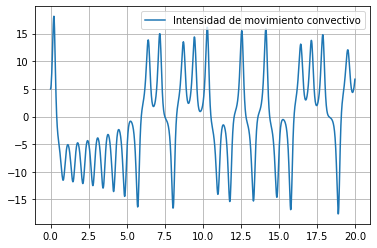

In [24]:
x0=np.array([5,5,5])
t=np.linspace(0,20,1000)
x=odeint(Lorenz,x0,t,args=(10,28,8/3))
x1=x[:,0]
x2=x[:,1]
x3=x[:,2]
plt.plot(t,x1,label='Intensidad de movimiento convectivo')
plt.legend(loc='best')
plt.grid()

- 2.3 Grafique el plano de fase de $x$ vs $y$.

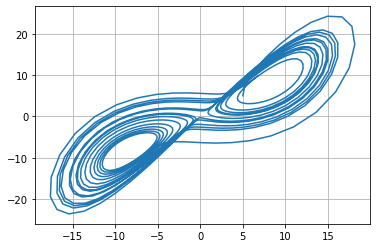

In [25]:
plt.plot(x1,x2)
plt.grid()

- 2.4 Grafique el plano de fase de $x$ vs $z$.

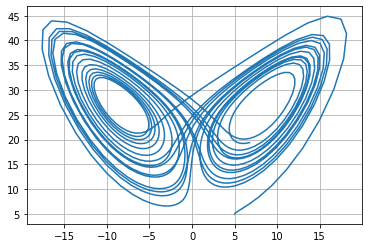

In [26]:
plt.plot(x1,x3)
plt.grid()